**Note**: The code is run on Colab so functions like cv2_imshow() will not work on local.


In [1]:
import os
os.chdir('/content/drive/My Drive/Kaggle/Image Processing Project')
!ls

 Image_processing.ipynb  'Paper 1.pdf'	 sample2.jfif   sample_image.jfif


#Converting the image to Grayscale

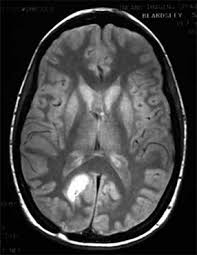

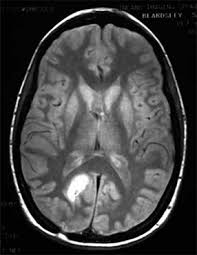

In [8]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread('sample2.jfif')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Original Image
cv2_imshow(image)
print('\t')
# Grayscale Image
cv2_imshow(gray)

# Applying Median filter

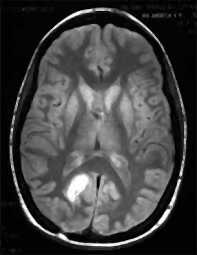

In [3]:
# applying meadian filter of kernel size 3
median = cv2.medianBlur(gray, 3)
cv2_imshow(median)

#Using Sobel Operation for Edge Detection

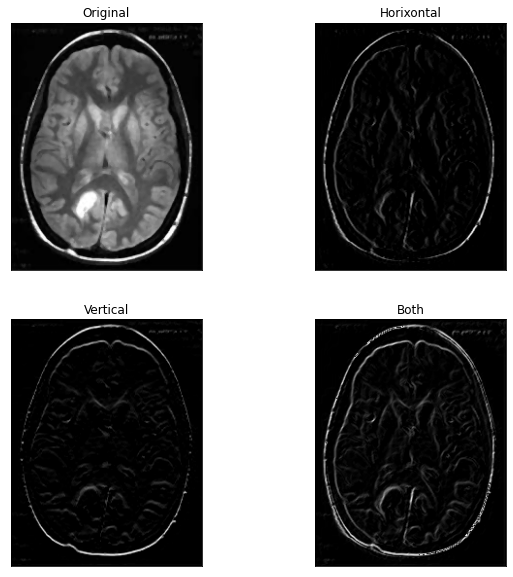

In [4]:
# Using Sobel operator for edge detection
# Detecting edges on x and y component seperately and the comparing them
edgesx = cv2.Sobel(median, -1, dx = 1, dy = 0, ksize = 1, scale = 1, delta = 0, borderType = cv2.BORDER_DEFAULT)
edgesy = cv2.Sobel(median, -1, dx = 0, dy = 1, ksize = 1, scale = 1, delta = 0, borderType = cv2.BORDER_DEFAULT)
edges = edgesx + edgesy

output = [median, edgesx, edgesy, edges]
titles = ['Original', 'Horixontal', 'Vertical', 'Both']
plt.figure(figsize=(10,10))
for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.imshow(output[i], cmap = 'gray')
  plt.title(titles[i])
  plt.xticks([])
  plt.yticks([])
plt.show()

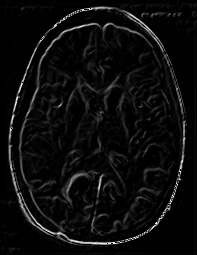

In [5]:
# The final edged image we will use
cv2_imshow(edges)

#Applying Morphological operations

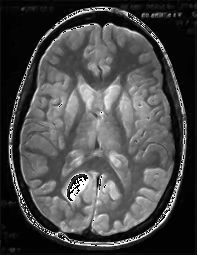

In [6]:
# combining edged image to the median image
image = edges+median
cv2_imshow(edges+median)

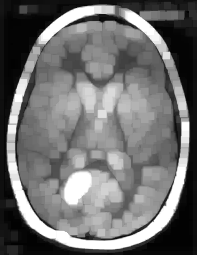

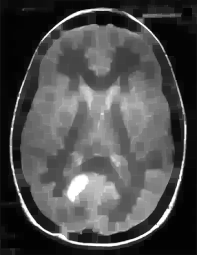

In [9]:
# applying morphological operations
kernel = np.ones((3,3), np.uint8)

# dilation with iteration 3
img_dilation = cv2.dilate(image, kernel, iterations=3)
cv2_imshow(img_dilation)

# erosing the dilated image
img_erosion = cv2.erode(img_dilation, kernel, iterations=3)
cv2_imshow(img_erosion)

# Thresholding the image

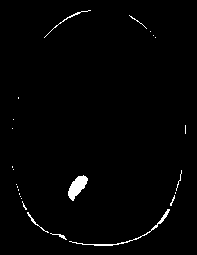

In [21]:
ret,thresh1 = cv2.threshold(img_erosion,240,255,cv2.THRESH_BINARY)
cv2_imshow(thresh1)

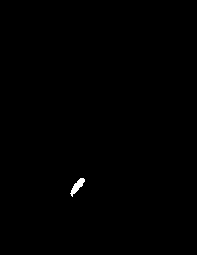

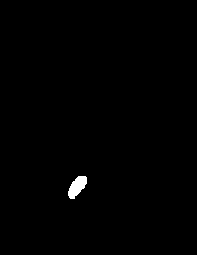

In [22]:
# Again applying morphological operations to remove the noise

img_erosion2 = cv2.erode(thresh1, kernel, iterations=2)
final_image = cv2.dilate(img_erosion2, kernel, iterations=2)
cv2_imshow(img_erosion2)
print('\n')
cv2_imshow(final_image)

# Resizing and area calculation

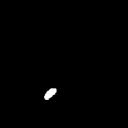

In [23]:
dim = (128,128)
# resize image
resized = cv2.resize(final_image, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

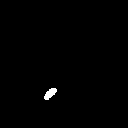

In [33]:
thresh2 = cv2.threshold(resized,100,255,cv2.THRESH_BINARY)[1]
cv2_imshow(thresh2)

In [34]:
thresh2 = cv2.cvtColor(thresh2, cv2.COLOR_BGR2GRAY)
count_white= cv2.countNonZero(thresh2)

In [35]:
count_white

92

As of now as area can be calculated on a same resized size for every image we can classify it into different classes of cancer based on the area.
